In [3]:
from keras import layers
from keras import models
from keras.datasets import mnist
from keras.utils import to_categorical

In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [5]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [11]:
#ConvNets Architecture

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [12]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 15s 16ms/step - loss: 0.4182 - accuracy: 0.8642: 14s - loss: 1.5054 - accuracy: 0.4 - ETA: 14s - loss: 1.4207 - accuracy: 0.518 - ETA: 14s - loss: 1.3931 - accur - ETA: 13s - loss: 1.1861 - accuracy: 0.600 - ETA: 13s - loss: 1.1695 - a - ETA: 12s - loss: 0.9946 - accuracy:  - ETA: 12s - loss: 0.9393 - accuracy - ETA: 11s - loss: 0.8784 - accuracy: 0 - ETA: 11s - loss: 0.8452 - accur - ETA: 8s - loss: - ETA: 7s - loss: 0.6317 - ac - ETA:  - ETA: 6s - loss: 0.5707 - accuracy: 0.81 - ETA: 6s - loss: 0.5684 - accuracy - ETA: 6s - loss: 0.5601 - accuracy: 0.81 - ETA: 6s - loss: 0.5579 - ac - ETA: 5s - loss: 0.5433 - accuracy: 0.82 - ETA: 5s - loss: 0.5418 -  - ETA: 5s - loss: 0.5268 - accu - ETA: 4s - loss: 0.5
Epoch 2/5
938/938 [==============================] - 18s 19ms/step - loss: 0.0486 - accuracy: 0.9853
Epoch 3/5
938/938 [==============================] - 15s 16ms/step - loss: 0.0327 - accuracy: 0.9892
Epoch 4/5
938/938 [==========

In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0253 - accuracy: 0.9928: 0s - loss: 0.0256 - accuracy: 0.


In [14]:
test_acc

0.9927999973297119

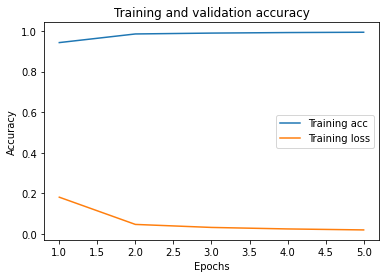

In [16]:
import matplotlib.pyplot as plt

plt.clf()    
history_dict = history.history
acc = history_dict['accuracy']
#val_acc = history_dict['val_acc']
loss_values = history_dict['loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, acc, '-', label='Training acc')
#plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.plot(epochs, loss_values, '-', label='Training loss')  
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()